In [ ]:
#VGG16 and ##Inception pre-trained models

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunnykumar19062","key":"e30e238d93979a024d540dce76e5d94c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d amrragababdelaziz/dermnet-and-skin-disease-9-classes

 99% 3.49G/3.51G [00:26<00:00, 131MB/s]
100% 3.51G/3.51G [00:26<00:00, 143MB/s]


In [ ]:
!unzip dermnet-and-skin-disease-9-classes.zip

Streaming output truncated to the last 5000 lines.
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_291.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_292.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_293.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_294.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_295.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_296.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_297.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_298.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_299.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other Viral Infections/6_3.jpg  
  inflating: Merged Dataset/Train/Warts Molluscum and other V

In [ ]:
train_dir = '/content/Merged Dataset/Train/'

In [ ]:
import os

In [ ]:
sub_folders=os.listdir(path='/content/Merged Dataset/test')

In [ ]:
print(sub_folders)

['Warts Molluscum and other Viral Infections', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Eczema Photos', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Atopic Dermatitis Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions']


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Merged Dataset/Train/", output="output",
    seed=1337, ratio=(.9, .1), group_prefix=None, move=False) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.


In [ ]:
'''
import os
import numpy as np
import shutil
import random
root_dir = '/content/Merged Dataset/Train/' # data root path
classes_dir = sub_folders #total labels

val_ratio = 0.10


for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls)
    os.makedirs(root_dir +'val/' + cls)
    


# Creating partitions of the data after shuffeling
src = root_dir + cls # Folder to copy images from

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, val_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - (val_ratio )))])
                                                        


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]


print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))


# Copy-pasting images
for name in train_FileNames:
    shutil.copy(name, root_dir +'train/' + cls)

for name in val_FileNames:
    shutil.copy(name, root_dir +'val/' + cls)

'''

Total images:  4472
Training:  4024
Validation:  448


In [ ]:
train_dir = '/content/output/train'
test_dir = '/content/Merged Dataset/test'
val_dir='/content/output/val'

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
import os
import random
import shutil
import numpy as np
from shutil import copyfile
from PIL import Image
%matplotlib inline
from sklearn.metrics import roc_auc_score
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
#from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 128
img_height, img_width = 300,300
input_shape = (img_height, img_width, 3)

In [ ]:
random_seed = np.random.seed(1142)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')

Found 23974 images belonging to 9 classes.
Found 2668 images belonging to 9 classes.
Found 2389 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (300, 300, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [ ]:
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

model.add(Flatten())
model.add(Dense(512 , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(512 , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(512, activation='relu'))
model.add(layers.Dropout(.2))





In [ ]:
# Add a dropout rate of 0.5


# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy',metrics = ['acc'])

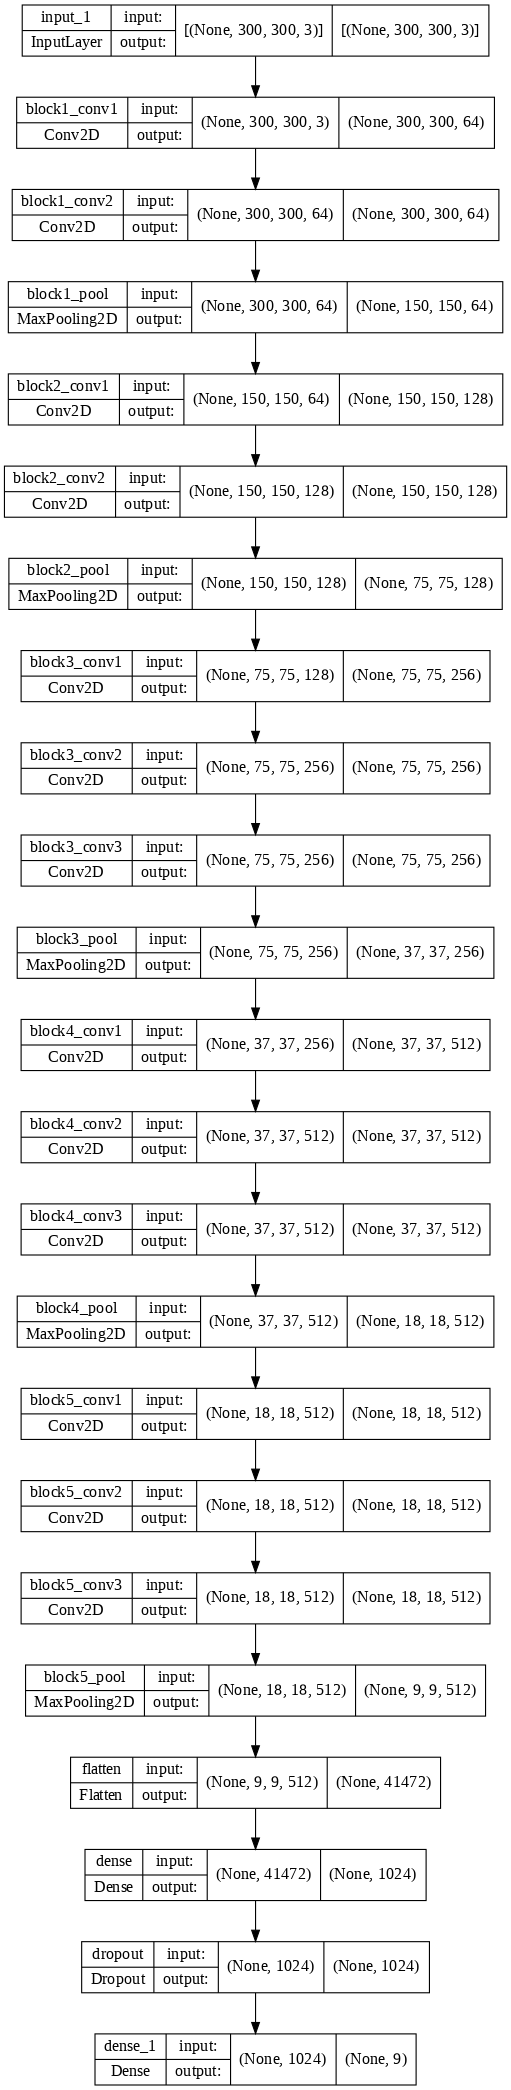

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True,expand_nested = True,dpi = 80)

In [ ]:
vgghist = model.fit(test_generator, validation_data = validation_generator,  epochs = 20)

Epoch 1/20
  27/2389 [..............................] - ETA: 44:39 - loss: 16.1627 - acc: 0.1111

KeyboardInterrupt: ignored

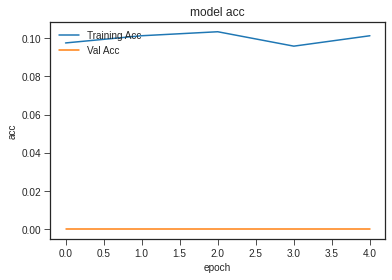

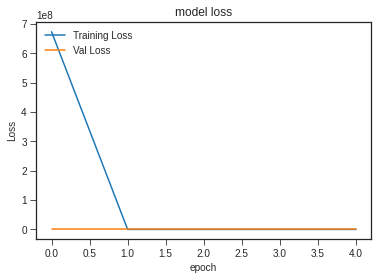

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-ticks")

plt.plot(vgghist.history['acc'])
plt.plot(vgghist.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(vgghist.history['loss'])
plt.plot(vgghist.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper left')
plt.show()

plt.figure()

In [ ]:
num_classes = len(train_generator.class_indices)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        shuffle=False) 
test_labels = test_generator.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

#print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
Found 2389 images belonging to 9 classes.
38/38 [==============================] - 23s 605ms/step
                                                                    precision    recall  f1-score   support

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.00      0.00      0.00       288
                                          Atopic Dermatitis Photos       0.00      0.00      0.00       123
                                                     Eczema Photos       0.00      0.00      0.00       309
                               Melanoma Skin Cancer Nevi and Moles       0.00      0.00      0.00       116
                                Nail Fungus and other Nail Disease       0.00      0.00      0.00       261
             Psoriasis pictures Lichen Planus and related diseases       0.00      0.00      0.00       352
                      Seborrheic Keratoses and other Benign Tumors       0.00      0.00      0.00       34

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
